# Creando nuestro propio KNN



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter

In [ ]:
# creamos un dataset nosotros y un punto que queremos clasificar

In [3]:
dataset = {
    'k':[[1,2],[2,3],[3,1]],
    'r':[[6,5],[7,7],[8,6]]
}
new_point = [5,7]

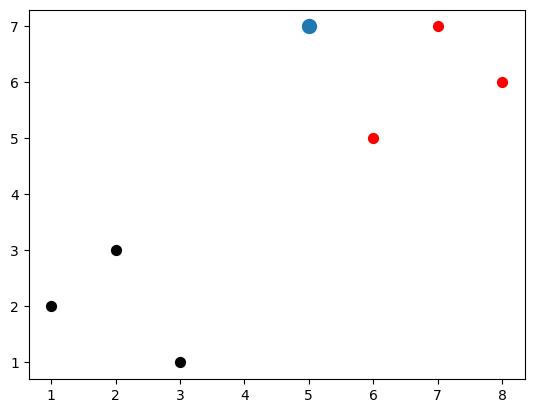

In [11]:
# vamos a hacer un plot de un modo nuevo

[[plt.scatter(j[0],j[1],s=50, color=i) for j in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1], s = 100)

In [ ]:
# otra manera de hacer el plot más fácil de entender y ya de paso añado el nuevo punto:

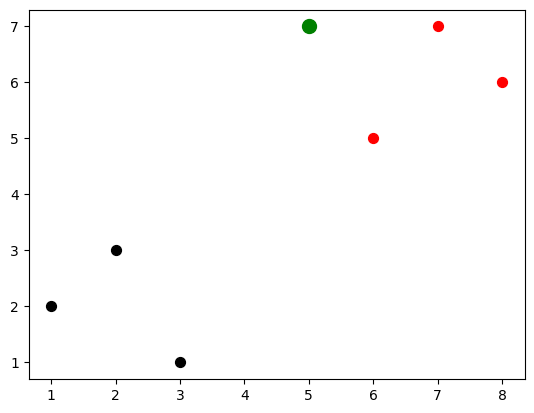

In [8]:
for i in dataset:
    for j in dataset[i]:
        plt.scatter(j[0],j[1],s=50, color=i)

plt.scatter(new_point[0],new_point[1],s=100, color="g")

In [19]:
def k_nearest_neighbors(data, predict, k = 3, verbose = False):                                             # creo esta función que tenga los data para entrenar y predict para predecir. k= 3 vecinos
    
    if len(data) >= k:                                                                                      # aquí hago un warning en el caso de que pongamos una k menor al numero total de elementos a votar
        warnings.warn("K es un valor menor que el número total de elementos a votar!!")
    
    distances = []
    for group in data:                                                                                      # data tiene dos elementos, el rojo y el negro, entonces, para cada group in data:
        for feature in data[group]:                                                                         # para cada elemento dentro de cada grupo sacamos la distancia:
            #d = sqrt((feature[0]-predict[0])**2 + (feature[1]-predict[1])**2)                              # usamos distancia euclidea a mano  ======ojo, esta distancia a mano vale solo si tengo dos columnas de datos ====ojo que podriamos usar otras distancias: la manhattan...
            #d = np.sqrt(np.sum((np.array(feature) - np.array(predict))**2))                                # numpy lo puede hacer más rápido (hace las distancias de todo el array a la vez) ======ojo, esta manera me sirve tanto si tengo 2 columnas como 200
            d = np.linalg.norm(np.array(feature) - np.array(predict))                                       # y hay una tercera manera: la funcion norm sirve para calcular lo mismo que arriba
            distances.append([d, group])                                                                    # hemos metido en la lista distances la distancia "d" entre todos los puntos y al lado ponemos a qué grupo pertenece
    if verbose:
        print(f"Esta es la lista distancias sin ordenar: {distances}")                                                                                    
    
    votes = [i[1] for i in sorted(distances)[:k]]#sorted ordena por la primera columna                      # ordenamos los elementos del array distance. sorted ordena por el primer item, que en este caso es d (distancia). me quedo con los primeros k elementos, ordenados de manera ascendente. Me quedo con i[1] (es decir, con el grupo) porque no me importa el punto en sí, me importa el grupo
                                                                                                            # lo que he hecho es ordenar distances, y quedarme con los k puntos más cercanos (en realidad me he quedado con su grupo)
    if verbose:
        print(f"Estos son los votos: {votes}")
    
    vote_result = Counter(votes).most_common(1)                                                             # el (1) significa que le estoy pidiendo solo el primero de la lista most.common, si pongo (2), me dará los dos primeros
    if verbose:
        print(f"Este es el resultado de la votación: {vote_result}")
    
    
    return vote_result[0][0]#[('r',2), ('k', 1)] : este es el resultado ejemplo que nos daría

In [ ]:
# aplico la función para el new_point

In [20]:
result = k_nearest_neighbors(dataset, new_point, k = 3, verbose = True)
result

Esta es la lista distancias sin ordenar: [[6.4031242374328485, 'k'], [5.0, 'k'], [6.324555320336759, 'k'], [2.23606797749979, 'r'], [2.0, 'r'], [3.1622776601683795, 'r']]
Estos son los votos: ['r', 'r', 'r']
Este es el resultado de la votación: [('r', 3)]


'r'

In [ ]:
# me dice que los tres primeros han votado al rojo

In [ ]:
# y ahora hago el plotter poniendo al nuevo punto de su color

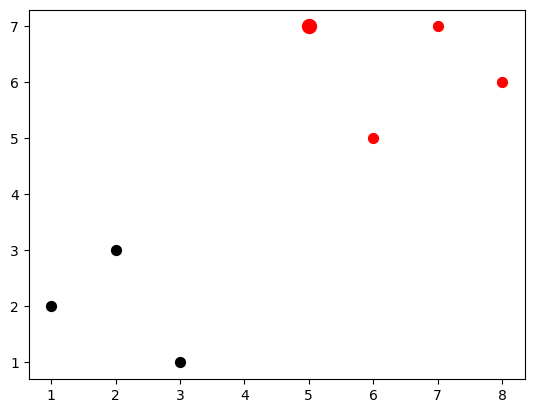

In [21]:
[[plt.scatter(j[0],j[1],s=50, color=i) for j in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1], s = 100, color=result)

In [ ]:
# hacemos otra prueba con otro punto: (3,4) por ejemplo:

In [22]:
new_new_point=[3,4]

In [23]:
result2 = k_nearest_neighbors(dataset, new_new_point, k = 3, verbose = True)
result2

Esta es la lista distancias sin ordenar: [[2.8284271247461903, 'k'], [1.4142135623730951, 'k'], [3.0, 'k'], [3.1622776601683795, 'r'], [5.0, 'r'], [5.385164807134504, 'r']]
Estos son los votos: ['k', 'k', 'k']
Este es el resultado de la votación: [('k', 3)]


'k'

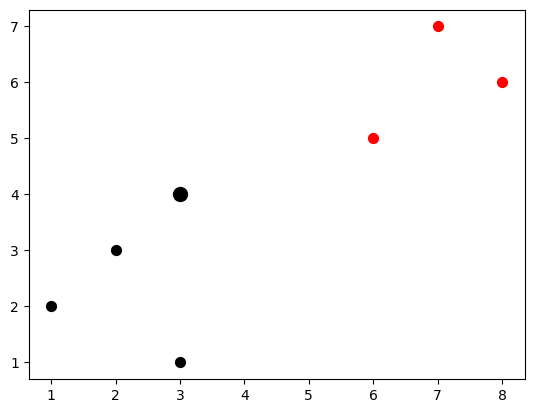

In [25]:
[[plt.scatter(j[0],j[1],s=50, color=i) for j in dataset[i]] for i in dataset]
plt.scatter(new_new_point[0],new_new_point[1], s = 100, color=result2)

In [ ]:
# y hacemos otro punto que cae en una zona donde no es tan obvio: (4.5,4)

Esta es la lista distancias sin ordenar: [[4.031128874149275, 'k'], [2.692582403567252, 'k'], [3.3541019662496847, 'k'], [1.8027756377319946, 'r'], [3.905124837953327, 'r'], [4.031128874149275, 'r']]
Estos son los votos: ['r', 'k', 'k']
Este es el resultado de la votación: [('k', 2)]


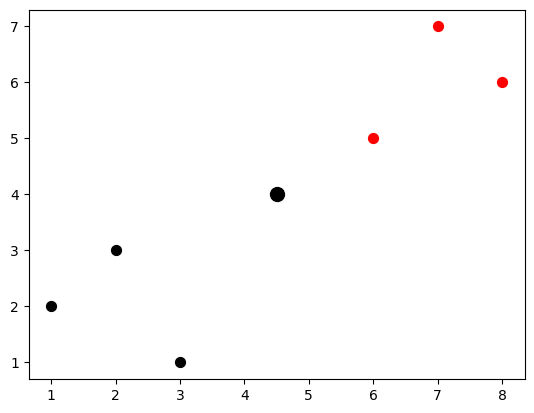

In [33]:
new_new_new_point=[4.5,4]
result3 = k_nearest_neighbors(dataset, new_new_new_point, k = 3, verbose = True)
result3
[[plt.scatter(j[0],j[1],s=50, color=i) for j in dataset[i]] for i in dataset]
plt.scatter(new_new_new_point[0],new_new_new_point[1], s = 100, color=result3)

# Aplicando nuestro KNN al Dataset del Cancer

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
import pandas as pd

In [37]:
df = pd.read_csv("/content/drive/MyDrive/Python Machine Learning JGG/datasets/cancer/breast-cancer-wisconsin.data.txt")

In [38]:
df.replace("?", -99999, inplace=True)

In [39]:
df.columns = ["name", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "class"]

In [40]:
df.drop(["name"], axis=1, inplace=True)

In [41]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [42]:
full_data = df.astype(float).values.tolist()

In [43]:
full_data

[[5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1.0, 2.0, 4.0],
 [6.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1

In [44]:
import random

In [45]:
random.shuffle(full_data)

In [46]:
test_size = 0.2

In [48]:
train_set = {2:[] , 4:[]}
test_set = {2:[] , 4:[]}

In [49]:
train_data= full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [50]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [52]:
train_set

{2: [[3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [6.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0],
  [3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [5.0, 3.0, 6.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 1.0, 1.0,

In [57]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k = 5, verbose=False)
        if group == vote:
            correct += 1
        total +=1
print("Eficacia del KNN = ",correct/total)

Eficacia del KNN =  0.9856115107913669
